**Score Moving Average**

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

plt.style.use('ggplot')
import talib as ta

In [2]:
data = pd.read_csv('dataset/TSLA (30:01:21).csv')
pd.set_option('display.max_columns', None)
data['Date'] = pd.to_datetime(data['Date'], format='%Y/%m/%d')
data.set_index('Date', inplace=True)
data['1d_back_close'] = data['Adj_Close'].shift(1)
data['1d_close_pct'] = data['Adj_Close'].pct_change(1)
feature_names = []
dummies = []
for n in [8, 13, 21, 34]:
    data['ema' + str(n)] = ta.EMA(data['Adj_Close'].values, timeperiod=n)
    feature_names = feature_names + ['ema' + str(n)]

for n in [55, 89, 144, 233]:
    data['sma' + str(n)] = ta.SMA(data['Adj_Close'].values, timeperiod=n)
    feature_names = feature_names + ['sma' + str(n)]

data.dropna(inplace=True)
print(data)

                  Open        High         Low       Close   Adj_Close  \
Date                                                                     
2016-12-30   43.259998   43.500000   42.335999   42.737999   42.737999   
2017-01-03   42.972000   44.066002   42.192001   43.397999   43.397999   
2017-01-04   42.950001   45.599998   42.862000   45.397999   45.397999   
2017-01-05   45.284000   45.495998   44.389999   45.349998   45.349998   
2017-01-06   45.386002   46.062000   45.090000   45.801998   45.801998   
...                ...         ...         ...         ...         ...   
2021-01-25  855.000000  900.400024  838.820007  880.799988  880.799988   
2021-01-26  891.380005  895.900024  871.599976  883.090027  883.090027   
2021-01-27  870.349976  891.500000  858.659973  864.159973  864.159973   
2021-01-28  820.000000  848.000000  801.000000  835.429993  835.429993   
2021-01-29  830.000305  842.409973  780.099976  793.530029  793.530029   

              Volume  1d_back_close  

In [3]:
def get_score(n):
    list = []
    for i in range(len(data[str(n)])):
        if data['Adj_Close'][i] > data[str(n)][i]:
            list.append(1)
        elif data['Adj_Close'][i] < data[str(n)][i]:
            list.append(-1)
        else:
            list.append(0)
    data['dum_' + str(n)] = np.array(list)

for n in feature_names:
    get_score(n)
    dummies = dummies + ['dum_' + str(n)]

get_score('1d_back_close')
print(data)

                  Open        High         Low       Close   Adj_Close  \
Date                                                                     
2016-12-30   43.259998   43.500000   42.335999   42.737999   42.737999   
2017-01-03   42.972000   44.066002   42.192001   43.397999   43.397999   
2017-01-04   42.950001   45.599998   42.862000   45.397999   45.397999   
2017-01-05   45.284000   45.495998   44.389999   45.349998   45.349998   
2017-01-06   45.386002   46.062000   45.090000   45.801998   45.801998   
...                ...         ...         ...         ...         ...   
2021-01-25  855.000000  900.400024  838.820007  880.799988  880.799988   
2021-01-26  891.380005  895.900024  871.599976  883.090027  883.090027   
2021-01-27  870.349976  891.500000  858.659973  864.159973  864.159973   
2021-01-28  820.000000  848.000000  801.000000  835.429993  835.429993   
2021-01-29  830.000305  842.409973  780.099976  793.530029  793.530029   

              Volume  1d_back_close  

total_dum_ema8= 201
total_dum_ema13= 213
total_dum_ema21= 227
total_dum_ema34= 245
total_dum_sma55= 259
total_dum_sma89= 351
total_dum_sma144= 305
total_dum_sma233= 321


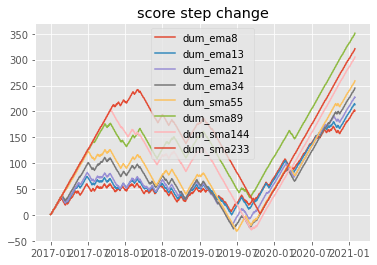

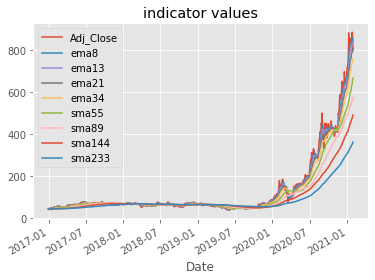

In [4]:
for n in dummies:
    plt.plot(data.index, np.cumsum(data[str(n)].values), label=str(n))
    print('total_' + str(n) + '=', np.cumsum(data[str(n)].values)[-1])
plt.legend()
plt.title('score step change')
plt.show()

data['Adj_Close'].plot()
for i in feature_names:
    data[str(i)].plot()
plt.title('indicator values')
plt.legend()
plt.show()
